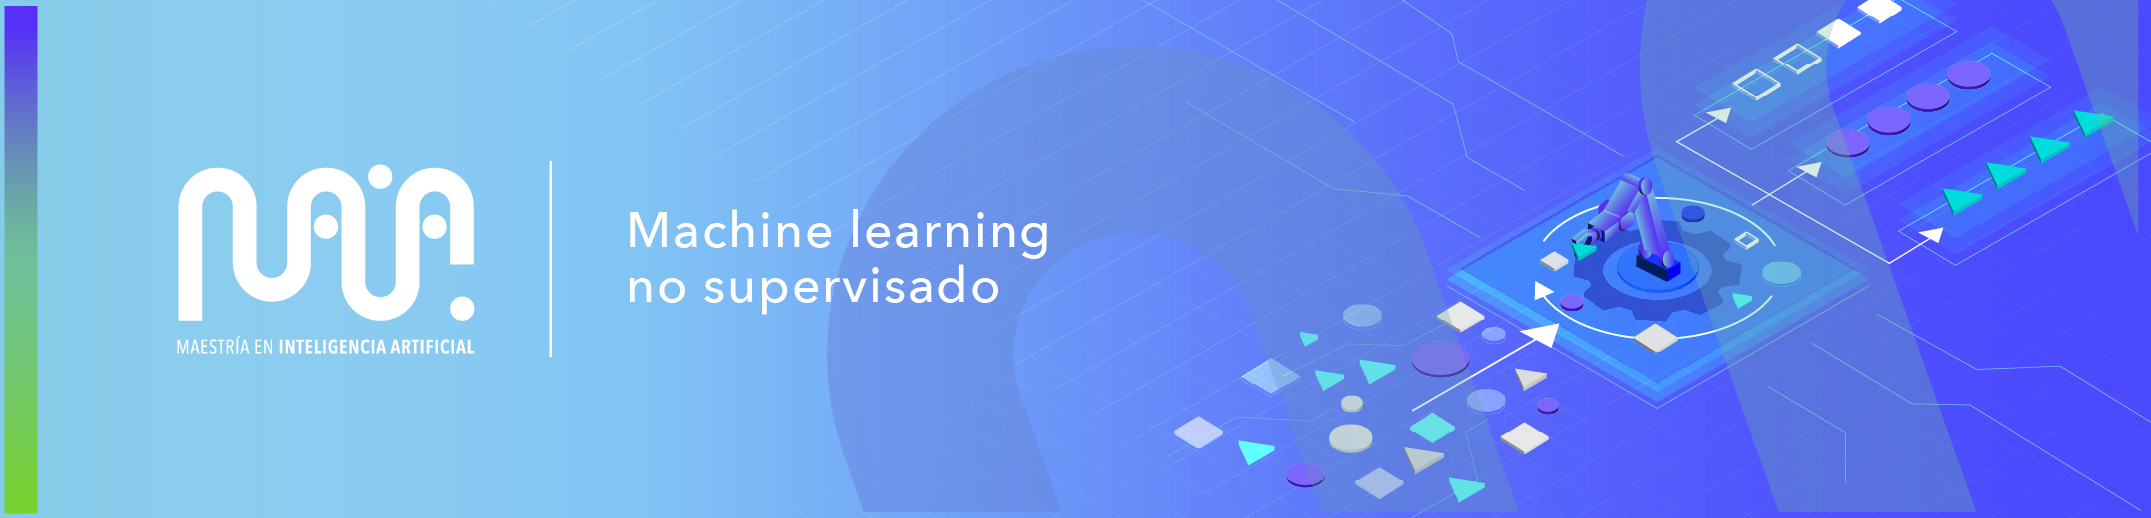

# Problema práctico de la semana. Exploración, limpieza y preparación del conjunto de datos.

En este notebook verás una forma de procesar los datos para el problema planteado utilizando la librería Pandas. En particular, se mostrará el procesamiento realizado para el tratamiento de nulos y duplicados, así como la estandarización de datos. En este sentido, veremos cómo realizar los siguientes procesos:

1. [Importar las librerías necesarias.](#1.-Importación-de-librerías-requeridas)
2. [Explorar y preparar el conjunto de datos de clientes.](#2.-Preparación-de-datos)

## 1. Importación de librerías requeridas

Importaremos las librerías `pandas`, `numpy` y `scikit-learn`, así como `joblib` para almacenar objetos:

In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, RobustScaler

## 2. Exploración y preparación de datos

Realizaremos la carga de datos usando la función de Pandas `read_csv()`, especificando la ruta y el separador del archivo:

In [2]:
data = pd.read_csv('data/Customer_Data.csv', sep=',')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,5323.148883,0.250693,26344.072201,38237.442525,3727.113162,15708.239684,0.496536,0.464442,0.821611,0.194502,100,77,16819.480037,21337.027458,39452.958121,0.817907,7
1,C10002,12726.638115,0.791307,37958.519019,5690.742440,18733.810964,38284.354433,0.699457,0.250327,0.654863,1.083902,78,156,15617.570575,8000.183624,63013.748477,0.343119,9
2,C10003,4305.572068,0.176531,28392.953338,36009.470088,2873.383232,14294.185035,0.419764,0.523662,0.899912,0.207049,72,81,15515.586213,27111.360493,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.003842,38246.863491,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.587974,23919.113404,38444.219979,0.883984,7
4,C10005,13820.920640,0.826914,42214.021633,7341.007821,19273.070991,40091.347849,0.821412,0.283579,0.501361,1.106350,88,182,14404.705067,6994.688474,62041.617340,0.383186,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C18946,6095.221156,0.234346,27094.007822,35917.204378,3463.821376,11711.578889,0.469832,0.539477,0.828321,0.191030,75,101,17623.810282,23954.396952,34841.829885,0.866856,7
8946,C18947,12682.575822,0.686025,38433.618847,5293.541956,18924.799798,34444.867317,0.710331,0.276426,0.546059,0.935152,95,170,12433.814929,7375.625322,66726.372993,0.306600,10
8947,C18948,16464.311409,0.189136,4296.196384,32554.759639,11231.500433,15214.671563,0.424665,0.746010,0.690380,1.063788,51,151,3307.587117,22947.759217,54761.962206,0.129242,8
8948,C18949,15531.883777,0.117118,12219.325647,31795.971700,12390.432127,13856.393208,0.450670,0.805140,0.608737,1.058548,61,178,6148.232910,21369.503519,50368.309060,0.087448,8


### Descripción de los datos

In [3]:
# Cantidad y dimensionalidad de los datos
data.shape

(8950, 18)

In [4]:
# Perfilamiento de los datos
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651600,6698.252490,3736.720194,10944.431111,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727313,9329.603116,31572.127683,0.336732,7.000000
50%,12007.718812,0.306650,30934.582274,31011.033488,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545347,21367.621276,48780.271754,0.432690,8.000000
75%,13740.565876,0.756061,39825.160798,34495.416423,19127.083036,36150.722564,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727124,25219.127375,57761.175985,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Observamos que todas nuestras variables son numéricas y con rangos muy diferentes.


### Eliminación de variables poco relevantes

Lo primero que haremos es eliminar la variable `CUST_ID`, que no aporta información relevante para nuestro problema:

In [5]:
data.drop('CUST_ID', axis=1, inplace=True)

### Datos duplicados

Ahora utilizaremos la función `duplicated()` para obtener la cantidad de datos duplicados en nuestro conjunto:

In [6]:
print(f'Duplicados: {data.duplicated().sum()}')

Duplicados: 0


Como no tenemos duplicados, podemos pasar directamente a tratar los datos nulos.

### Datos nulos

Para revisar la cantidad de datos nulos, usaremos la función `isna()`:

In [7]:
print(f'Nulos:\n{data.isna().sum()}')

Nulos:
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


Como puedes ver, tenemos datos nulos en las variables `CREDIT_LIMIT` y `MINIMUM_PAYMENTS`. En este caso, usaremos la función `dropna()` para eliminarlos, pero podrías realizar una imputación si quieres mantenerlos: 

In [8]:
data.dropna(inplace=True)

### Datos outliers

Podemos determinar si hay datos que puedan considerarse extremos, cuántos y en qué variables utlizando el rango intercuartil:

In [9]:
# Se calcula el rango intercuartil y se determinan los outliers por variable
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
total = outliers.sum() 
print(total)

BALANCE                                0
BALANCE_FREQUENCY                      0
PURCHASES                            733
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY      18
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                     239
PURCHASES_TRX                          0
CREDIT_LIMIT                        2108
PAYMENTS                               5
MINIMUM_PAYMENTS                       0
PRC_FULL_PAYMENT                       0
TENURE                                 0
dtype: int64


In [10]:
# Número de datos con outliers
datos_outliers = outliers.any(axis=1).sum()
print(f"Número de datos con outliers: {datos_outliers}")

Número de datos con outliers: 2109


Dada la cantidad de datos se considera entonces no eliminarlos. Acá se puede resaltar que estos datos pueden dar cuenta de algunas caraterísticas interesantes que pueden ayudar en la segmentación.

### Estandarización

Finalmente, realizaremos una estandarización de los datos, para así evitar que las magnitudes de las variables tengan influencia sobre los algoritmos. En este caso usaremos un `RobustScaler()` que es más robusto que `StandarScaler()` cuando se tienen valores extremos:

In [11]:
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.706404,-0.096365,-0.360201,0.259907,-0.461199,-0.149359,-0.022136,-0.174313,0.721663,-0.943983,0.666667,-0.831933,0.674718,-0.001738,-0.356376,0.804098,-0.333333
1,0.075457,0.855976,0.554035,-0.911285,0.513621,0.746618,0.527013,-0.713970,0.159355,0.170412,-0.148148,-0.168067,0.242031,-0.841000,0.543236,-0.186756,0.333333
2,-0.767884,-0.224286,-0.277162,0.260246,-0.482262,-0.497470,-0.176037,0.183976,0.591893,-0.901636,-0.148148,-0.781513,-0.726723,0.160748,-0.394892,0.941998,-0.333333
3,0.191021,0.918701,0.889008,-0.851900,0.548651,0.818332,0.857051,-0.630162,-0.358285,0.198539,0.222222,0.050420,-0.194601,-0.904274,0.506117,-0.103139,0.666667
4,0.045087,0.706886,0.767803,-0.894535,0.556992,0.514631,0.898597,-0.478037,-0.269085,0.028564,0.777778,0.336134,-0.140526,-0.789773,0.360487,-0.071436,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.624868,-0.125160,-0.301170,0.176413,-0.478302,-0.307974,-0.094401,0.014804,0.744291,-0.948332,-0.259259,-0.630252,0.964277,0.162969,-0.532440,0.906252,-0.333333
8632,0.070804,0.670512,0.591432,-0.925578,0.526027,0.594241,0.556441,-0.648191,-0.207554,-0.015968,0.481481,-0.050420,-0.904121,-0.880302,0.684994,-0.262969,0.666667
8633,0.470182,-0.204803,-2.095708,0.055416,0.026279,-0.168947,-0.216634,0.535351,0.279126,0.145210,-1.148148,-0.210084,-4.189564,0.099623,0.228162,-0.633106,0.000000
8634,0.371711,-0.331669,-1.472036,0.028111,0.101562,-0.222853,-0.146259,0.684382,0.003808,0.138643,-0.777778,0.016807,-3.166931,0.000306,0.060401,-0.720327,0.000000


### Almacenamiento del conjunto

Con nuestro conjunto ya procesado, podemos realizar la agrupación. Para no tener que repetir este proceso, vamos a persistir el conjunto utilizando la función `to_csv()`:

In [12]:
scaled_df.to_csv('data/Customer_Data_processed.csv', index=False)

Además, para poder realizar un análisis de los clústeres resultantes con mayor facilidad, vamos a almacenar el objeto `robust_scaler` para deshacer la estandarización cuando sea necesario:

In [13]:
joblib.dump(robust_scaler, 'obj/robust_scaler.joblib')

['obj/robust_scaler.joblib']

## Cierre

En este notebook viste un procesamiento sencillo para el conjunto de datos que utilizaremos en un problema de agrupación. Particularmente, viste un posible tratamiento de datos nulos y duplicados con la librería `Pandas`, así como la estandarización del conjunto mediante la clase `RobustScaler()`.

---
*Creado por: Nicolás Díaz*  
*Revisado por: Haydemar Nuñez*  
*Versión de: Diciembre 8, 2023*  
*Universidad de los Andes*   